In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result_folder = "results/20250306_104959"
result_files = glob.glob(f"{result_folder}/*/results.parquet")

In [3]:
result_files

['results/20250306_104959/25451fc6/results.parquet',
 'results/20250306_104959/27d4015f/results.parquet',
 'results/20250306_104959/821791af/results.parquet',
 'results/20250306_104959/c75e2504/results.parquet',
 'results/20250306_104959/8c8dd530/results.parquet',
 'results/20250306_104959/e44c611e/results.parquet',
 'results/20250306_104959/7ef2372d/results.parquet',
 'results/20250306_104959/c1657eea/results.parquet',
 'results/20250306_104959/70a71cb9/results.parquet',
 'results/20250306_104959/d2b3b2ef/results.parquet',
 'results/20250306_104959/efc22d7e/results.parquet',
 'results/20250306_104959/ebf1e7dc/results.parquet',
 'results/20250306_104959/27e0c546/results.parquet',
 'results/20250306_104959/065b90a9/results.parquet',
 'results/20250306_104959/53ebaf7e/results.parquet',
 'results/20250306_104959/a27407f0/results.parquet',
 'results/20250306_104959/9941c0cd/results.parquet',
 'results/20250306_104959/be61a03c/results.parquet',
 'results/20250306_104959/42de13bf/results.par

In [4]:
run_dfs = [pd.read_parquet(f) for f in result_files]
for run_id, df in enumerate(run_dfs):
    df['run_id'] = run_id
results_df = pd.concat(run_dfs, ignore_index=True)

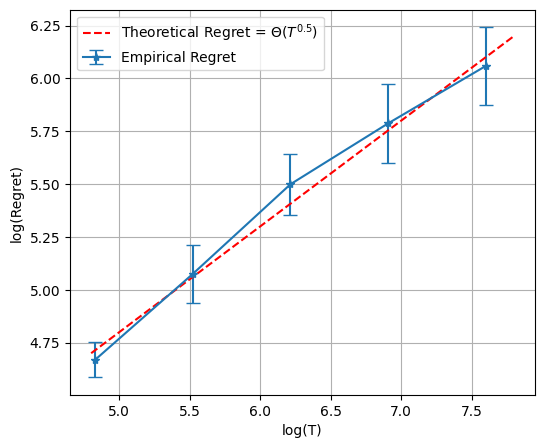

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

results_by_algo_and_horizon = results_df.groupby('algo')
for m, (algo_name, algo_results) in enumerate(results_by_algo_and_horizon):
    if algo_name in ["CAP"]:
        algo_results['regret'] = algo_results['optimal_revenue'] - algo_results['expected_revenue']
        total_regret = np.log(algo_results.groupby(['run_id', 'T'])['regret'].sum())
        avg_total_regret = total_regret.groupby('T').mean().reset_index()
        std_total_regret = total_regret.groupby('T').std().reset_index()
        plt.errorbar(np.log(avg_total_regret['T']), avg_total_regret['regret'], yerr=std_total_regret['regret'], label="Empirical Regret", capsize=5, marker="*")

x = np.linspace(4.8, 7.8, 100)
y = 0.5 * x + 2.3
plt.plot(x, y, color='red', linestyle='dashed', label=r"Theoretical Regret = $\Theta(T^{0.5})$")

plt.xlabel('log(T)')
plt.ylabel('log(Regret)')
plt.legend()
plt.grid()
plt.show()